In [57]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score
import datetime
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

In [58]:
dataset = pd.read_csv('/home/haimanot/DataSet/Coffee_dataset.csv', parse_dates = True ,index_col="Date")
                      #,parse_dates=True)


In [28]:
dataset.head()

,Open,high,Low,Close,Adj Close,Ton
Date,,,,,,
2011-05-31,970,1000,950,973,973,15.30
2011-06-01,955,970,955,955,955,112.20
2011-06-02,940,940,930,942,942,28.05
2011-06-03,950,950,940,950,950,53.55
2011-06-06,960,962,960,960,960,33.15


In [59]:
actual_price = dataset.tail(1)

In [60]:
actual_price

,Open,high,Low,Close,Adj Close,Ton
Date,,,,,,
2018-12-26,956,956,956,956,956,2.87


In [29]:
dataset.describe()

,Open,high,Low,Close,Adj Close,Ton
count,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000
mean,766.617934,771.640676,761.249513,766.420403,766.420403,25.350877
std,186.112878,187.508766,184.604892,186.178688,186.178688,19.023333
min,440.000000,450.000000,435.000000,448.000000,448.000000,2.550000
25%,620.000000,620.000000,617.500000,620.000000,620.000000,10.200000
50%,735.000000,740.000000,730.000000,735.000000,735.000000,20.400000
75%,900.000000,910.000000,892.000000,900.000000,900.000000,35.700000
max,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,122.400000


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1539 entries, 2011-05-31 to 2018-12-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1539 non-null   int64  
 1   high       1539 non-null   int64  
 2   Low        1539 non-null   int64  
 3   Close      1539 non-null   int64  
 4   Adj Close  1539 non-null   int64  
 5   Ton        1539 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 84.2 KB


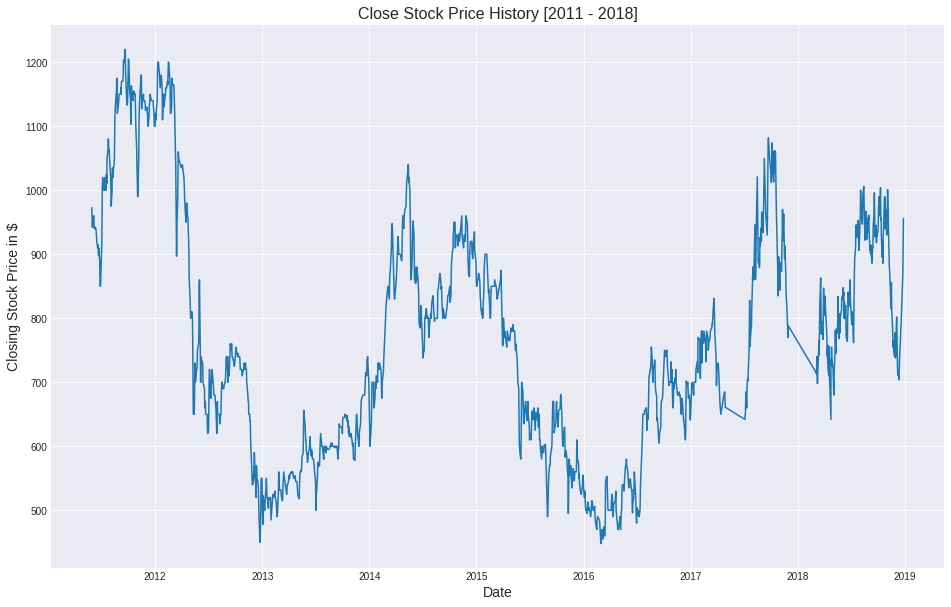

In [31]:
plt.plot(dataset['Close'],label = 'Close Price History')



# Set figure title
plt.title('Close Stock Price History [2011 - 2018]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
#fig.autofmt_xdate()

# Show plot
plt.show()

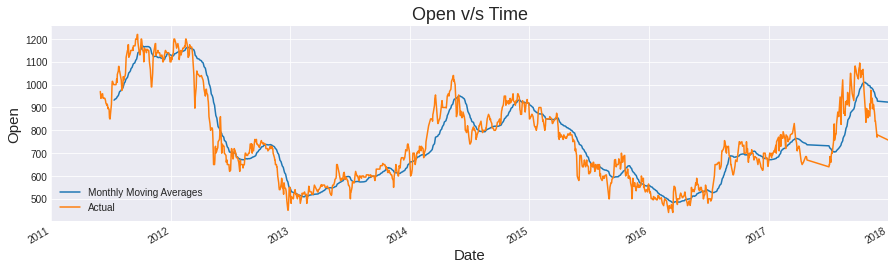

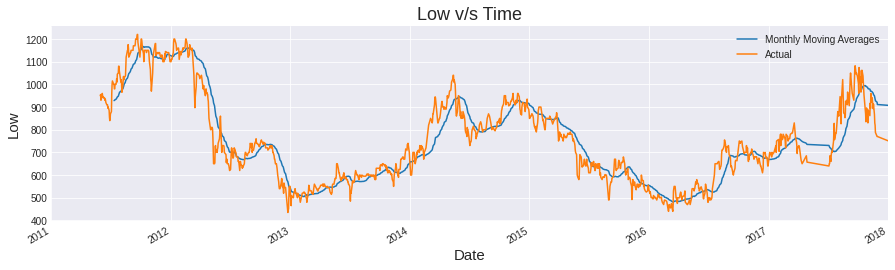

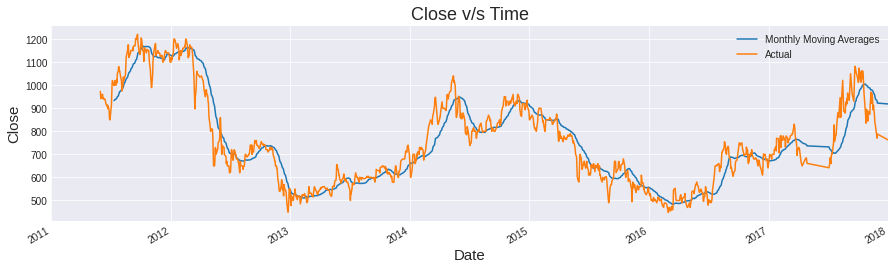

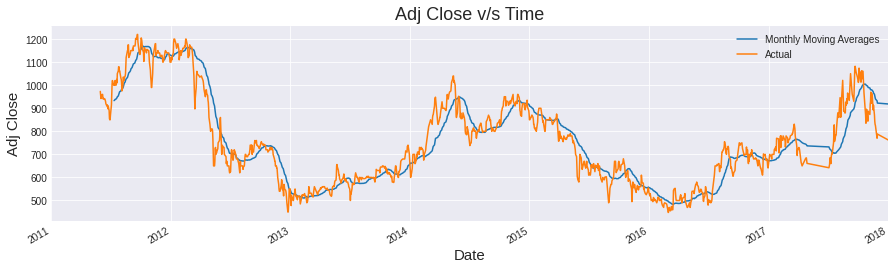

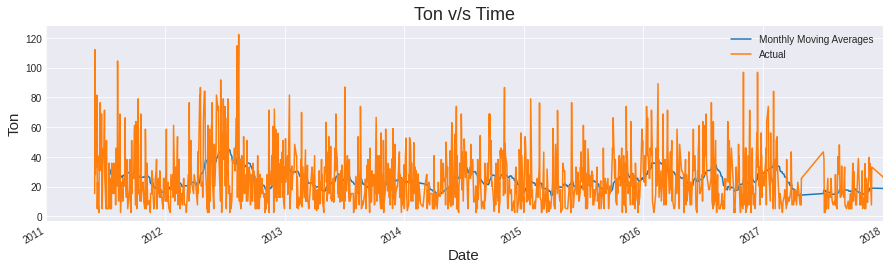

In [32]:
cols = dataset.drop('high',axis = 1).columns.values

for x in cols:
    
    plt.figure(figsize=(15,4))
    dataset[x].loc['2011':'2018'].rolling(window = 30).mean().plot(label = 'Monthly Moving Averages') #window = 30 means 1 month
    dataset[x].loc['2011':'2018'].plot(label = 'Actual')
    plt.xlabel('Date', fontsize = 15)
    plt.xlim('2011','2018')
    plt.ylabel(x, fontsize = 15)
    plt.title(x + ' v/s Time', fontsize = 18)
    plt.legend()
    plt.show()

In [33]:
dataset = np.array(dataset)

In [34]:
#OHLC
OHLC = dataset[:, 1:5].astype(float)
OHLC = OHLC.mean(axis=1)
OHLC = OHLC.reshape(-1, 1)
scalerOHLC = MinMaxScaler()
OHLC = scalerOHLC.fit_transform(OHLC)
OHLC


array([[0.68206785],
       [0.66235864],
       [0.6361874 ],
       ...,
       [0.44426494],
       [0.54636511],
       [0.65880452]])

In [35]:
#AdjustedOHLC
AdjustedOHLC = dataset[:, 8:12].astype(float)
AdjustedOHLC = AdjustedOHLC.mean(axis=1)
AdjustedOHLC = AdjustedOHLC.reshape(-1, 1)
scalerAdjustedOHLC = MinMaxScaler()
AdjustedOHLC = scalerAdjustedOHLC.fit_transform(AdjustedOHLC)
AdjustedOHLC


array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

In [36]:
#HLC
HLC = dataset[:, 2:5].astype(float)
HLC = HLC.mean(axis=1)
HLC = HLC.reshape(-1, 1)
scalerHLC = MinMaxScaler()
HLC = scalerHLC.fit_transform(HLC)
HLC


array([[0.67139785],
       [0.65806452],
       [0.63612903],
       ...,
       [0.44516129],
       [0.54709677],
       [0.65935484]])

In [37]:
#AdjustedHLC
AdjustedHLC = dataset[:, 9:12].astype(float)
AdjustedHLC = AdjustedHLC.mean(axis=1)
AdjustedHLC = AdjustedHLC.reshape(-1, 1)
scalerAdjustedHLC = MinMaxScaler()
AdjustedHLC = scalerAdjustedHLC.fit_transform(AdjustedHLC)
AdjustedHLC


array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

In [38]:
dataset = pd.DataFrame(OHLC)
dataset.head(5)

,0
0,0.682068
1,0.662359
2,0.636187
3,0.647819
4,0.664620


In [39]:
dataset = np.array(dataset)
step_size = 1
X = dataset[:-step_size]
y = dataset[step_size:]
print(X.shape)
print(y.shape)
train_length = int(X.shape[0] * 0.8)
test_length = X.shape[0] - train_length
X_train = X[:train_length].reshape(-1, 1, 1)
X_test = X[train_length:].reshape(-1, 1, 1)
y_train = y[:train_length]
y_test = y[train_length:]
X_train.shape

(1538, 1)
(1538, 1)


(1230, 1, 1)

In [40]:
print(dataset)

[[0.68206785]
 [0.66235864]
 [0.6361874 ]
 ...
 [0.44426494]
 [0.54636511]
 [0.65880452]]


In [41]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
model = Sequential()
model.add(LSTM(units=16, input_shape=(None, 1), return_sequences=True))
model.add(LSTM(units=32, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, batch_size=32, epochs=100)


Epoch 1/100
39/39 [==============================] - 0s 2ms/step - loss: 0.1888
Epoch 2/100
39/39 [==============================] - 0s 3ms/step - loss: 0.1299
Epoch 3/100
39/39 [==============================] - 0s 3ms/step - loss: 0.0626
Epoch 4/100
39/39 [==============================] - 0s 4ms/step - loss: 0.0290
Epoch 5/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0206
Epoch 6/100
39/39 [==============================] - 0s 5ms/step - loss: 0.0126
Epoch 7/100
39/39 [==============================] - ETA: 0s - loss: 0.006 - 0s 3ms/step - loss: 0.0064
Epoch 8/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 9/100
39/39 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 10/100
39/39 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 11/100
39/39 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 12/100
39/39 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 13/100


39/39 [==============================] - 0s 3ms/step - loss: 6.4613e-04
Epoch 98/100
39/39 [==============================] - 0s 4ms/step - loss: 6.4944e-04
Epoch 99/100
39/39 [==============================] - 0s 4ms/step - loss: 6.5251e-04
Epoch 100/100
39/39 [==============================] - 0s 3ms/step - loss: 6.6047e-04


In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, None, 16)          1152      
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                6272      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 7,457
Trainable params: 7,457
Non-trainable params: 0
_________________________________________________________________


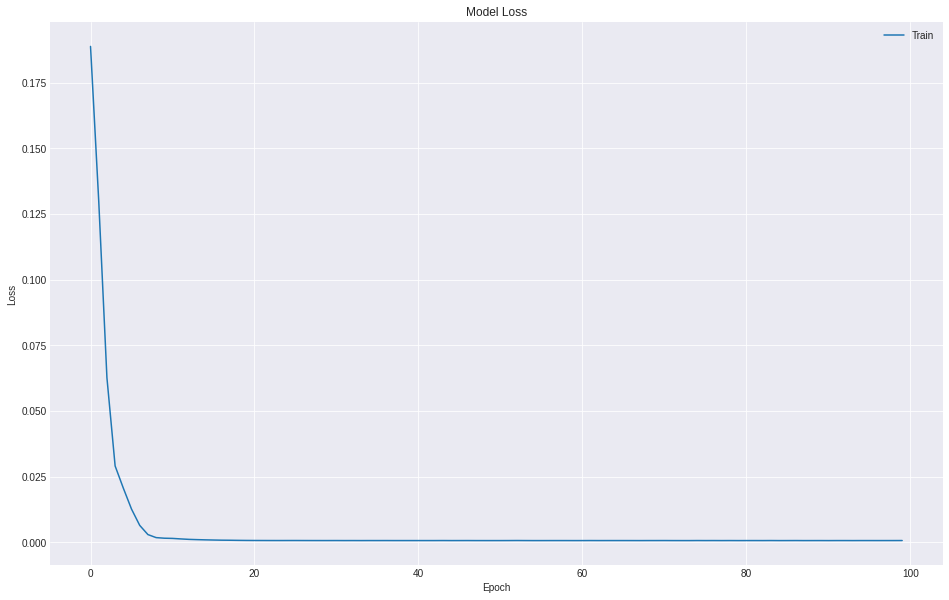

In [43]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [44]:
y_predict = scalerOHLC.inverse_transform(model.predict(X_test))
y_test = scalerOHLC.inverse_transform(y_test)
print(r2_score(y_test, y_predict))
np.c_[y_predict, y_test]

0.9006608035764395


array([[ 766.72467041,  762.25      ],
       [ 757.84741211,  763.        ],
       [ 758.60699463,  783.5       ],
       [ 779.4642334 ,  760.        ],
       [ 755.57000732,  732.25      ],
       [ 727.66986084,  742.5       ],
       [ 737.93481445,  780.        ],
       [ 775.89038086,  770.        ],
       [ 765.70837402,  750.        ],
       [ 745.47595215,  762.25      ],
       [ 757.84741211,  768.5       ],
       [ 764.18487549,  770.75      ],
       [ 766.47058105,  781.25      ],
       [ 777.1661377 ,  785.        ],
       [ 780.99749756,  789.5       ],
       [ 785.60296631,  790.        ],
       [ 786.11529541,  830.75      ],
       [ 828.21112061,  810.        ],
       [ 806.69104004,  780.        ],
       [ 775.89038086,  768.75      ],
       [ 764.4387207 ,  745.        ],
       [ 740.44567871,  730.        ],
       [ 725.42303467,  698.75      ],
       [ 694.46191406,  720.        ],
       [ 715.4654541 ,  720.        ],
       [ 715.4654541 ,  7

NameError: name 'coord_x_date' is not defined

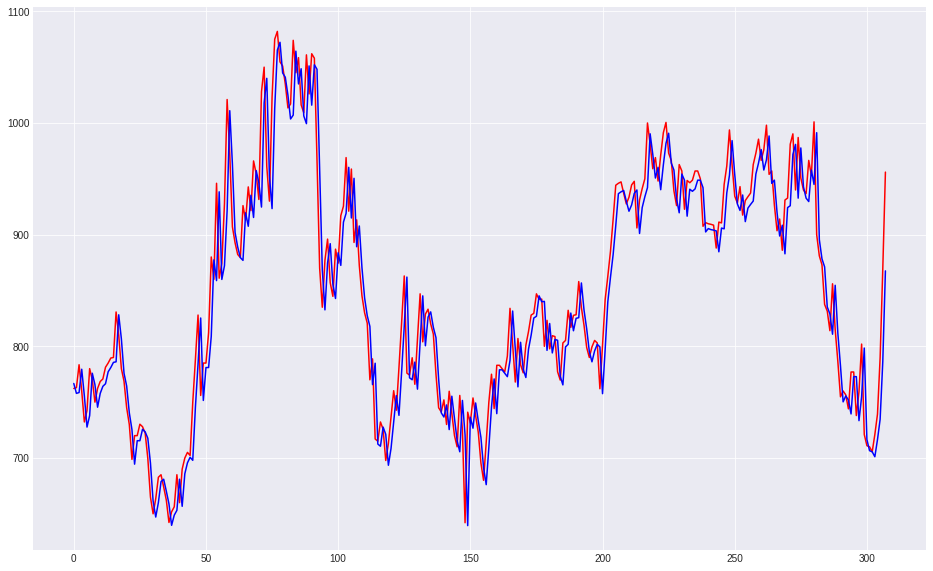

In [55]:
plt.plot(y_test, color = 'red', label = 'Actual Price')
plt.plot(y_predict, color = 'blue', label = 'Predicted Price')
 #Set x label
coord_x_date(xlim = c("2011", "2018"))

#plt.xlabel('Date', fontsize=14)
plt.legend()
plt.show()